<a href="https://colab.research.google.com/github/Nnamchisimi/Nnamchisimi/blob/main/lstm_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


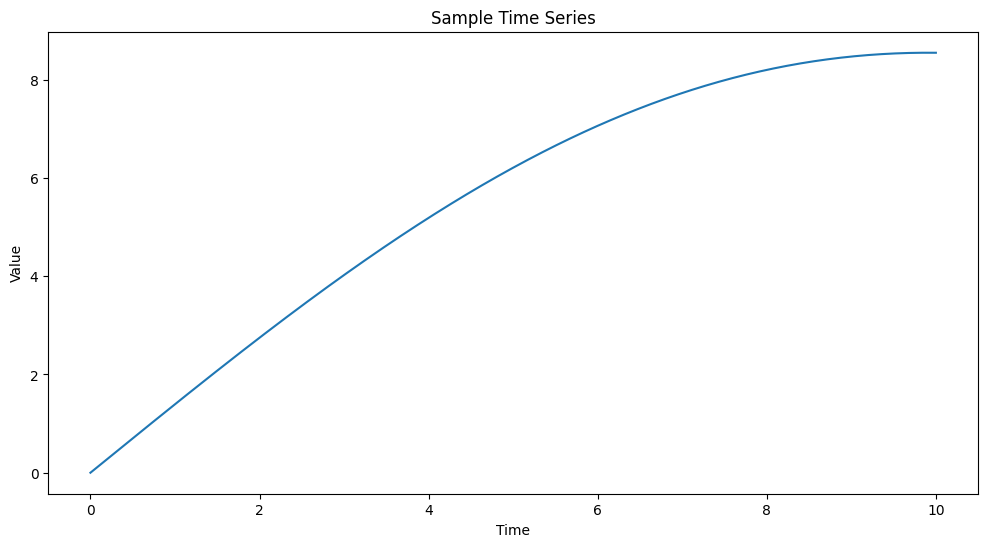

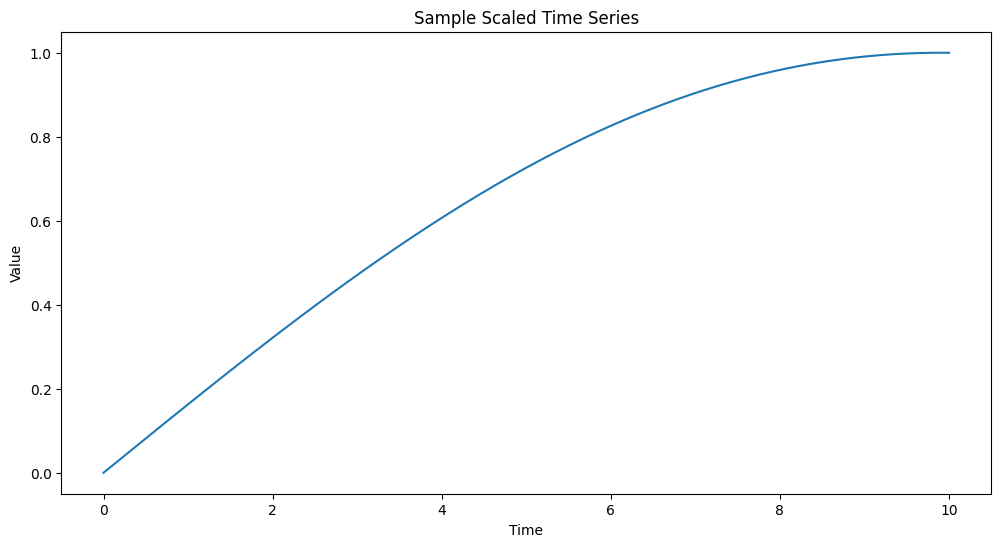

Epoch 1/50
7/7 [==============================] - 3s 5ms/step - loss: 0.1760
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0341
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 6.4871e-04
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 4.1494e-04
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 2.0715e-04
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 8.9291e-05
Epoch 11/50
7/7 [==============================] - 0s 4ms/step - loss: 5.9150e-05
Epoch 12/50
7/7 [==============================] - 0s 4ms/step - loss: 4.8680e-05
Epoch 13/50
7/7 [==============================] 

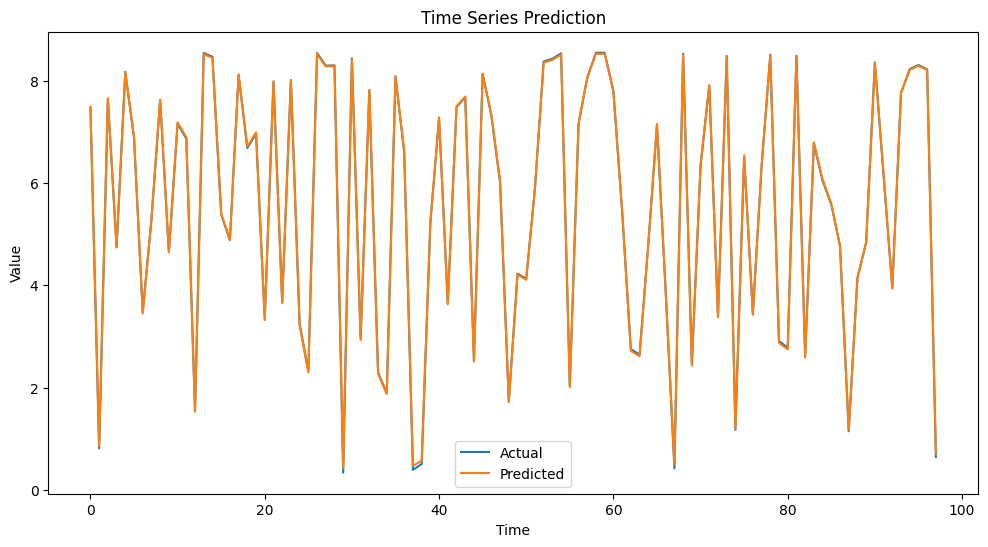

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate a sample sine wave time series
t = np.linspace(0, 10, 500)
series = 5 * np.sin(0.2 * t) + 0.4 * t

# Plot the sample time series
plt.figure(figsize=(12, 6))
plt.plot(t, series)
plt.title("Sample Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Normalize the data
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series.reshape(-1, 1))

# Plot the sample time series
plt.figure(figsize=(12, 6))
plt.plot(t, scaled_series)
plt.title("Sample Scaled Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Create sequences and labels for time series prediction
sequence_length = 10
X, y = [], []

for i in range(len(scaled_series) - sequence_length):
    X.append(scaled_series[i:i + sequence_length])
    y.append(scaled_series[i + sequence_length])


X, y = np.array(X), np.array(y)

#print (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train is the training data in the form of (num_samples, sequence_length, num_features)
#y_train is the corresponding target data for the training data.  Has the shape (num_samples, num_output_features).
#x_test: This is the testing data (num_test_samples, sequence_length, num_features)
#y_test: is the corresponding target data for the testing data. It contains the true output for each testing sample in x_test. Has the shape (num_test_samples, num_output_features).


# Build and train your LSTM model
#model = Sequential()
#model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
#model.add(LSTM(units=1000, activation='relu', return_sequences=False))
#model.add(Dense(1) )

# Build and train your LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1) )


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

learning_rate=0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions and evaluate your model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Time Series Prediction")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()